# 1. Data Descripition

In [3]:
library(tidyverse)

In [8]:
players <- read_csv('data/players.csv')
sessions <- read_csv('data/sessions.csv')

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1.1 Players

In [9]:
head(players)

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA


In [10]:
dim(players)

[1] 196   9

In [11]:
summary(players)

  experience        subscribe       hashedEmail         played_hours    
 Length:196         Mode :logical   Length:196         Min.   :  0.000  
 Class :character   FALSE:52        Class :character   1st Qu.:  0.000  
 Mode  :character   TRUE :144       Mode  :character   Median :  0.100  
                                                       Mean   :  5.846  
                                                       3rd Qu.:  0.600  
                                                       Max.   :223.100  
     name              gender               age        individualId  
 Length:196         Length:196         Min.   : 8.00   Mode:logical  
 Class :character   Class :character   1st Qu.:17.00   NA's:196      
 Mode  :character   Mode  :character   Median :19.00                 
                                       Mean   :21.28                 
                                       3rd Qu.:22.00                 
                                       Max.   :99.00                 

In [12]:
glimpse(players)

Rows: 196
Columns: 9
$ experience       <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "A…
$ subscribe        <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRU…
$ hashedEmail      <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee97…
$ played_hours     <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.…
$ name             <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Ad…
$ gender           <chr> "Male", "Male", "Male", "Female", "Male", "Female", "…
$ age              <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 17, 22, 23, 17, 25, 22…
$ individualId     <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…
$ organizationName <lgl> NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, NA, N…


1. Size:
The player dataset has 196 players (rows) and 9 columns.

2. Columns:
We have columns like the players' experience level , whether they subscribe or not, their gaming hours, names, gender, and age. Each player also has a hashed email address for privacy. 

3. Age and Playing Time Patterns:
The players' ages range from 8 to 99 years old, with most players of 19-22 year old. Playing time varies a lot - some players haven't played at all (0 hours), others have played up to 223 hours. However, most players have played less than 1 hour (the median is just 0.1 hours).

4. Missing Data:
Two columns - individualId and organizationName - are empty (all NaN values).

## 1.2 Sessions

In [13]:
head(sessions)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12


In [14]:
dim(sessions)

[1] 1535    5

In [15]:
summary(sessions)

 hashedEmail         start_time          end_time         original_start_time
 Length:1535        Length:1535        Length:1535        Min.   :1.712e+12  
 Class :character   Class :character   Class :character   1st Qu.:1.716e+12  
 Mode  :character   Mode  :character   Mode  :character   Median :1.719e+12  
                                                          Mean   :1.719e+12  
                                                          3rd Qu.:1.722e+12  
                                                          Max.   :1.727e+12  
                                                                             
 original_end_time  
 Min.   :1.712e+12  
 1st Qu.:1.716e+12  
 Median :1.719e+12  
 Mean   :1.719e+12  
 3rd Qu.:1.722e+12  
 Max.   :1.727e+12  
 NA's   :2          

In [16]:
glimpse(sessions)

Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…


1. Size:
This dataset has 1,535 gaming sessions recorded (rows) and 5 columns.

2. Columns:
Each session is tracked using the player's hashed email, and has both human-readable times and computer timestamp versions.

3. Missing Values:
Most of the data is complete, but there are 2 missing values in original_end_time. This might mean that two sessions didn't properly record their ending times.

4. Time Patterns:
From the sample rows we can see that sessions happen at different times of day and for different lengths - some are short (11 minutes) and some are longer (23 minutes). The dates in our sample span from May to July 2024.

# 2. Question

1. Question: **We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.**

We'll measure this through player consistency (number of unique days played) as our response variable, using player characteristics (experience level, age, gender, played hours, subscription status) as predictors.

2. Data Wrangling Steps Needed:
- Extract the dates from sessions data
- Count unique days each player participated
- Join this with the players dataset using hashedEmail
- Clean up any missing values or irregularities in the data

3. How can data help?
The sessions dataset tells us the time players participated, letting us measure their consistency through unique playing days. The players dataset provides characteristics like experience and age, helping us identify what makes consistent players stand out. By connecting these datasets, we can predict which types of players are likely to participate regularly.

# 3. EDA and Visualization

In [18]:
sessions_by_player <- sessions |>
  # Convert start_time to date (removing time component)
  mutate(play_date = as.Date(start_time, format = "%d/%m/%Y")) |>
  # Group by player
  group_by(hashedEmail) |>
  # Count unique days played
  summarise(
    unique_days = n_distinct(play_date),
    total_sessions = n()
  )

head(sessions_by_player)

hashedEmail,unique_days,total_sessions
<chr>,<int>,<int>
0088b5e134c3f0498a18c7ea6b8d77b4b0ff1636fc93355ccc95b45423367832,2,2
060aca80f8cfbf1c91553a72f4d5ec8034764b05ab59fe8e1cf0eee9a7b67967,1,1
0ce7bfa910d47fc91f21a7b3acd8f33bde6db57912ce0290fa0437ce0b97f387,1,1
0d4d71be33e2bc7266ee4983002bd930f69d304288a8663529c875f40f1750f3,6,13
0d70dd9cac34d646c810b1846fe6a85b9e288a76f5dcab9c1ff1a0e7ca200b3a,2,2
11006065e9412650e99eea4a4aaaf0399bc338006f85e80cc82d18b49f0e2aa4,1,1


In [19]:
# Join with player information
player_analysis <- players %>%
  left_join(sessions_by_player, by = "hashedEmail")

head(player_analysis)

experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName,unique_days,total_sessions
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<lgl>,<lgl>,<int>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,NA,NA,18,27
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,NA,NA,2,3
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,NA,NA,1,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,NA,NA,1,1
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,NA,NA,1,1
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,NA,NA,NA,NA


Warning message:
“Removed 71 rows containing non-finite outside the scale range (`stat_bin()`).”


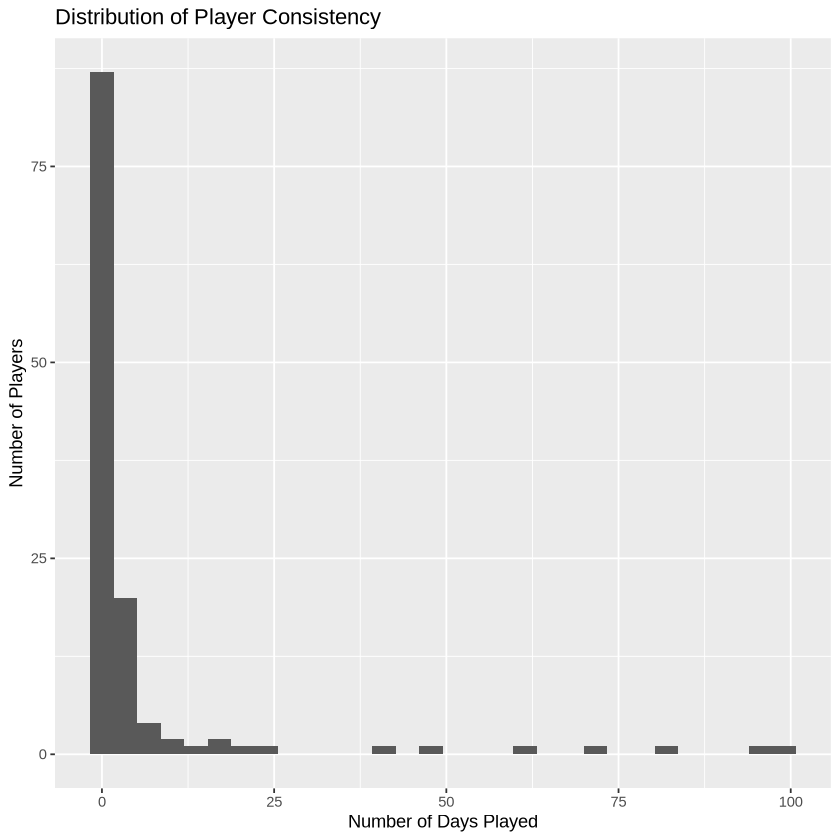

In [22]:
# 1. Distribution of consistency (unique days played)
ggplot(player_analysis, aes(x = unique_days)) +
  geom_histogram(bins = 30) +
  labs(
    title = "Distribution of Player Consistency",
    x = "Number of Days Played",
    y = "Number of Players"
  )

Player participation is heavily skewed, with most players active on few days while a small group is highly active.

Warning message:
“Removed 71 rows containing non-finite outside the scale range
(`stat_summary()`).”


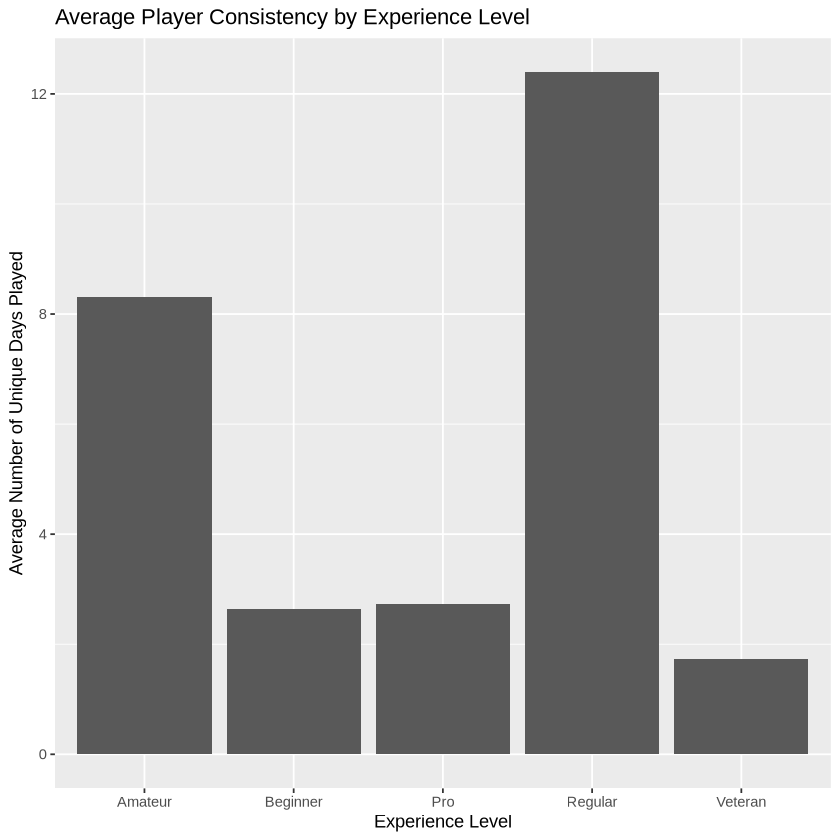

In [27]:
# 2. Consistency by experience level
ggplot(player_analysis, aes(x = experience, y = unique_days)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(
    title = "Average Player Consistency by Experience Level",
    x = "Experience Level",
    y = "Average Number of Unique Days Played"
  )

Regular players show highest average consistency (12 days), followed by Amateurs (8 days), while Pro and Veteran players average only 2-3 days.

Warning message:
“Removed 71 rows containing missing values or values outside the scale range
(`geom_point()`).”


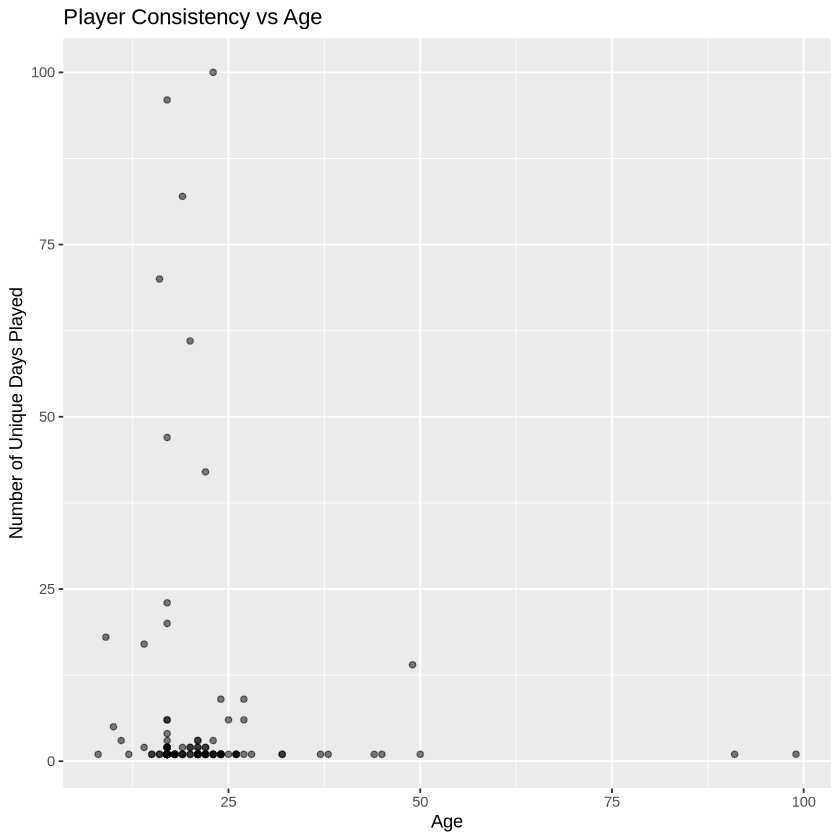

In [30]:
# 3. Relationship between age and consistency
ggplot(player_analysis, aes(x = age, y = unique_days)) +
  geom_point(alpha = 0.5) +
  labs(
    title = "Player Consistency vs Age",
    x = "Age",
    y = "Number of Unique Days Played"
  )

Age shows no clear pattern with consistency, though most players are under 25.

Warning message:
“Removed 71 rows containing non-finite outside the scale range
(`stat_summary()`).”


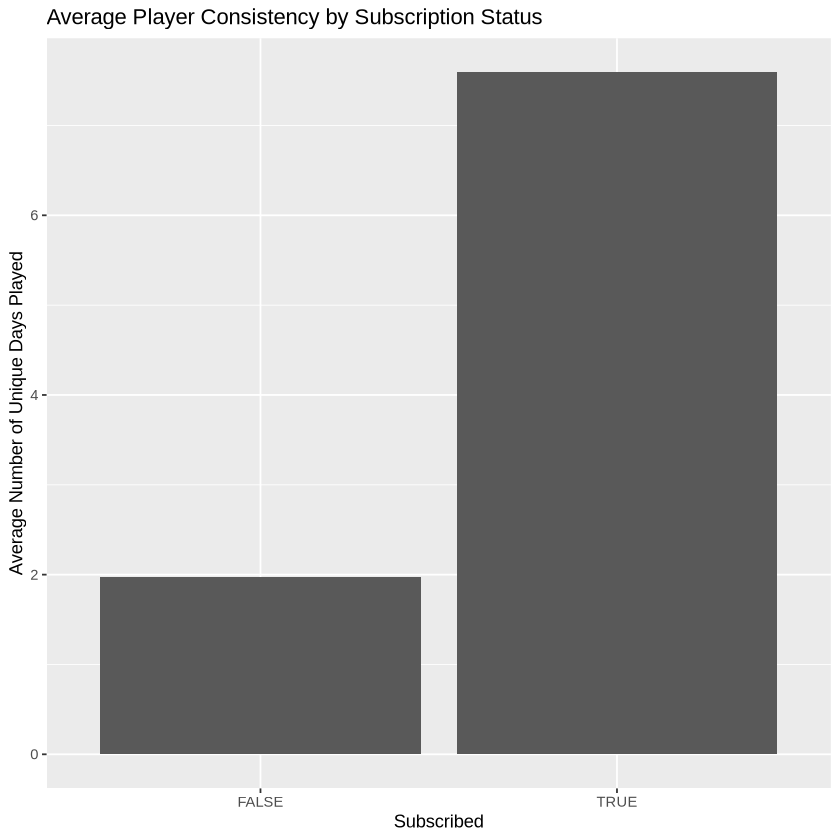

In [32]:
# 4. Consistency by subscription status
ggplot(player_analysis, aes(x = subscribe, y = unique_days)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(
    title = "Average Player Consistency by Subscription Status",
    x = "Subscribed",
    y = "Average Number of Unique Days Played"
  )

Subscribed players are notably more consistent, averaging 7 days versus 2 days for non-subscribers.

# 4. Method

We can use K-Nearest Neighbors (KNN) regression since our response variable is continuous and we have multiple predictors. KNN will predict a player's consistency by averaging similar players' patterns. This method requires features to be on similar scales and assumes nearby points have similar values.

1. Data Processing:
- Extract and count unique playing days per player
- Standardize numerical features
- Convert categorical variables to numerical
- Split data: 70% training, 30% testing

2. Model Development:
- Try different k values (3, 5, 7, 9)
- Use 5-fold cross-validation
- Select the best model with lowest Mean Squared Error
- Validate on test set

Main limitations include KNN's sensitivity to feature scaling and the challenge of choosing optimal k. However, KNN's ability to handle multiple predictors and capture non-linear patterns makes it suitable for our analysis.